In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loans_income = pd.read_csv('loans_income.csv')
loans_income.shape

(50000, 1)

## Sampling Distribution of a Statistic

In [4]:
samples = loans_income.sample(n=1000)
samples.shape

(1000, 1)

In [5]:
#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()
sample_mean_5

44561    53449.0
20753    77042.0
32724    76542.0
19463    79967.0
3109     86367.0
          ...   
32304    75000.0
18877    51800.0
20370    53600.0
40849    51000.0
3440     59600.0
Name: x, Length: 996, dtype: float64

In [6]:
#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()
sample_mean_20

33286    69218.50
19528    71616.75
12873    70741.75
26566    69741.75
7042     73841.75
           ...   
32304    75481.60
18877    72746.60
20370    71246.60
40849    66996.60
3440     68646.60
Name: x, Length: 981, dtype: float64

In [7]:
# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()
sample_mean_30

37913    65445.666667
20022    69211.166667
23601    68394.500000
35447    67661.166667
12093    68794.500000
             ...     
32304    75887.733333
18877    74354.400000
20370    75687.733333
40849    75187.733333
3440     77021.066667
Name: x, Length: 971, dtype: float64

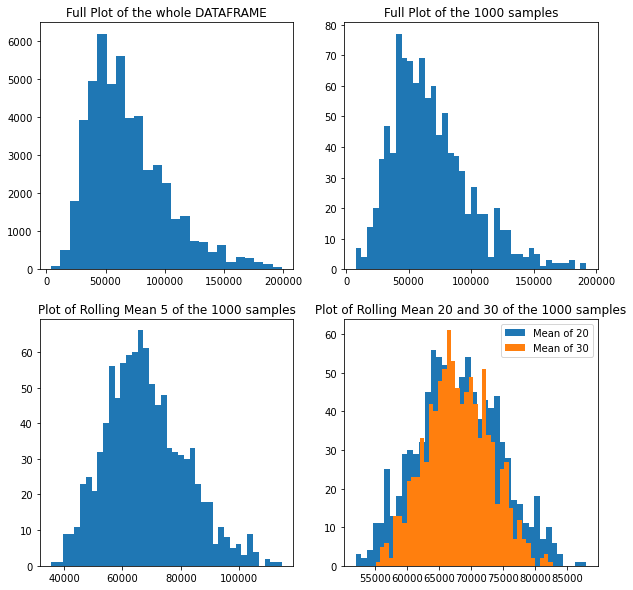

In [8]:
fig = plt.figure(figsize=(10,10))

#The full distribution of the plot:

ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

In [9]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))
print('Total Population Mode : ',loans_income.x.mode())

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527
Total Population Mode :  0    60000
dtype: int64


## The Bootstrap

In [10]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_1000

array([ 72000,  52000,  57000,  57000,  80000,  26000,  45000,  80000,
        77004,  28000,  92000,  60000,  94000, 100000,  79416,  98000,
        72500,  60000, 100000,  60000,  50000,  36000,  30000,  56000,
       123000,  78000,  54000,  53500, 120000,  98000,  56000,  62999,
        55000,  36000,  34500,  23056, 101320, 130000,  80000,  24000,
        60000,  19755,  68000,  50200,  71000, 120000,  84872,  75000,
       115000,  60000,  54000, 144000,  37600,  31000, 130000,  51000,
        83200, 150000, 150000,  61000,  85000,  42000,  70000, 175000,
        70000,  62500,  64000,  60000,  85000,  32000,  50000,  47000,
       100000,  63000,  35000,  61000,  80000,  55000,  33300,  95000,
        92000,  73000,  55000,  83300,  42000,  60000, 125000,  55000,
        39996, 100000,  69400,  45000,  38000,  50000,  83000,  18000,
        57000,  36500,  52000,  60000,  45000,  31000,  45000,  80000,
        41000,  60000,  41885,  29128,  72000,  60000,  58000, 105000,
      

In [11]:
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_10000

array([ 95000,  65000,  25000, ...,  50000,  75000, 100000], dtype=int64)

In [12]:
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
bootstrap_20000

array([ 58240, 131000,  31000, ...,  38147,  70000,  60000], dtype=int64)

In [13]:
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
arr_bootstraps

[array([ 72000,  52000,  57000,  57000,  80000,  26000,  45000,  80000,
         77004,  28000,  92000,  60000,  94000, 100000,  79416,  98000,
         72500,  60000, 100000,  60000,  50000,  36000,  30000,  56000,
        123000,  78000,  54000,  53500, 120000,  98000,  56000,  62999,
         55000,  36000,  34500,  23056, 101320, 130000,  80000,  24000,
         60000,  19755,  68000,  50200,  71000, 120000,  84872,  75000,
        115000,  60000,  54000, 144000,  37600,  31000, 130000,  51000,
         83200, 150000, 150000,  61000,  85000,  42000,  70000, 175000,
         70000,  62500,  64000,  60000,  85000,  32000,  50000,  47000,
        100000,  63000,  35000,  61000,  80000,  55000,  33300,  95000,
         92000,  73000,  55000,  83300,  42000,  60000, 125000,  55000,
         39996, 100000,  69400,  45000,  38000,  50000,  83000,  18000,
         57000,  36500,  52000,  60000,  45000,  31000,  45000,  80000,
         41000,  60000,  41885,  29128,  72000,  60000,  58000, 

In [14]:
len(arr_bootstraps)

3

In [15]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32360.804857571213
Bootstrap Mean :  69598.465
Bootstrap Median:  64000.0
Boostrap Bias,  -837.9465599999967
Standard Error: 1023.3385026616583

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32886.414849362074
Bootstrap Mean :  68334.1665
Bootstrap Median:  60540.0
Boostrap Bias,  426.3519399999932
Standard Error: 328.86414849362075

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32762.134203063215
Bootstrap Mean :  68475.93365
Bootstrap Median:  61217.0
Boostrap Bias,  284.5847899999935
Standard Error: 231.66327261129723

---

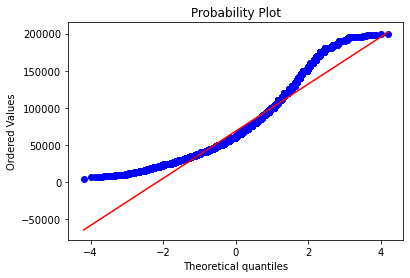

In [16]:
stats.probplot(loans_income.x, dist="norm", plot=pylab)
pylab.show()

In [20]:
sp500_px = pd.read_csv('sp500_px.csv')
sp500_px.head(3)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.000,0.0


In [21]:
sp500_px['NFLX'].head

<bound method NDFrame.head of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1226    0.0
1227    0.0
1228    0.0
1229    0.0
1230    0.0
Name: NFLX, Length: 1231, dtype: float64>

In [22]:
nflx = sp500_px.loc[:,'NFLX']

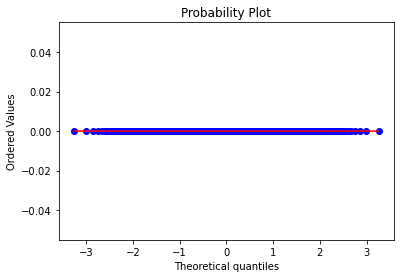

In [23]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

C:\Users\yashu\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yashu\anaconda3\lib\site-packages\numpy\lib\function_base.py:1281: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


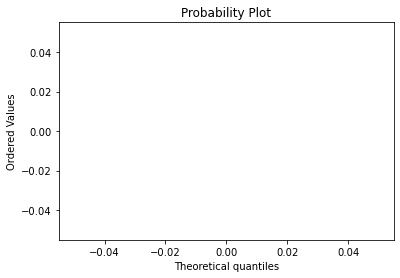

In [27]:
# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()

In [28]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.

#What is probablity of getting zero success in the 1000 test

print(sum(s==0)/1000)

0.002
